<a href="https://colab.research.google.com/github/nvadood/RL-Multi-Armed-Bandits/blob/main/epsilon_greedy_non_stationary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

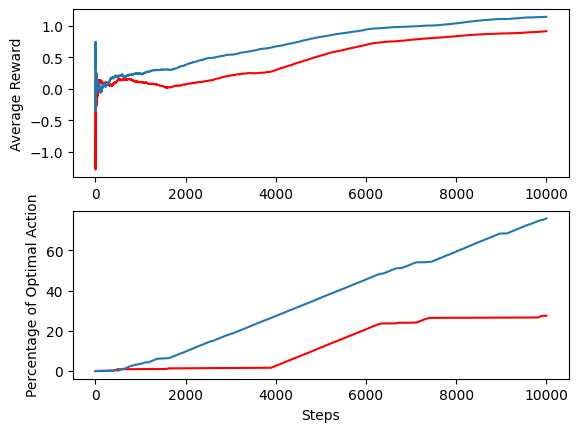

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize
Qa = np.zeros(10)
Qalpha = np.zeros(10)
reward = np.zeros(10)
qstar = np.zeros(10)
timeStep = 1
epsilon = 0.1
totalSteps = 10000
alpha = 0.1
action_counts = np.zeros(10)
averageReward = np.zeros(totalSteps)
averageRewardAlpha = np.zeros(totalSteps)
optimalActionAlpha = np.zeros(totalSteps)
optimalAction = np.zeros(totalSteps)

# choose the first arm randomly
randomArm = np.random.randint(0, 10)

# q*(a) start out equal, the first reward from a normal distribution with mean zero and unit variance
reward[randomArm] = np.random.normal(
    loc=0.0, scale=1, size=None)

# In both schemes the first Q for the first arm is equal to the reward itself
Qa[randomArm] = reward[randomArm]
Qalpha[randomArm] = reward[randomArm]

# The first element of the average reward for both schemes
averageReward[0] = Qa[randomArm]
averageRewardAlpha[0] = Qalpha[randomArm]

# Average of rewards in the constant step-size parameter method
def sampleAverage(Action):
    reward[Action] = np.random.normal(
        loc=qstar[Action], scale=1, size=None)

    action_counts[Action] += 1

    if qstar[Action] == qstarMax:
        optimalAction[timeStep:] += 1

    Qa[Action] = Qa[Action]+(1/action_counts[Action]
                             )*(reward[Action]-Qa[Action])

    averageReward[timeStep] = averageReward[timeStep-1] + \
        (1/timeStep)*(reward[Action]-averageReward[timeStep-1])
    return averageReward

# Average of rewards in the sample average method
def constantAlpha(Action):
    reward[Action] = np.random.normal(
        loc=qstar[Action], scale=1, size=None)

    if qstar[Action] == qstarMax:
        optimalActionAlpha[timeStep:] += 1

    Qalpha[Action] = Qalpha[Action] + \
        alpha*(reward[Action]-Qalpha[Action])

    averageRewardAlpha[timeStep] = averageRewardAlpha[timeStep-1] + \
        (1/timeStep)*(reward[Action]-averageRewardAlpha[timeStep-1])
    return averageRewardAlpha


# loop
while timeStep < totalSteps:
    for j in range(10):
        qstar[j] = qstar[j] + \
            np.random.normal(loc=0.0, scale=0.01, size=None)

    qstarMax = np.amax(qstar)

    probabilityDraw = np.random.rand()

    if probabilityDraw < epsilon:
        randomAction = np.random.randint(0, 10)
        constantAlpha(randomAction)
        sampleAverage(randomAction)
    else:
        greedyAction = Qa.argmax()
        greedyActionAlpha = Qalpha.argmax()
        constantAlpha(greedyActionAlpha)
        sampleAverage(greedyAction)

    timeStep = timeStep+1

plt.subplot(2, 1, 1)
plt.plot(np.arange(totalSteps), averageReward, 'r',label='sample average method')
plt.plot(np.arange(totalSteps), averageRewardAlpha,label='alpha=0.1')
plt.ylabel('Average Reward')

plt.subplot(2, 1, 2)
plt.plot(np.arange(totalSteps), (optimalAction/totalSteps)*100, 'r')
plt.plot(np.arange(totalSteps), (optimalActionAlpha/totalSteps)*100)
plt.xlabel('Steps')
plt.ylabel('Percentage of Optimal Action')


plt.show()
